<a href="https://colab.research.google.com/github/devivempati09/FMML-LAB-1/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

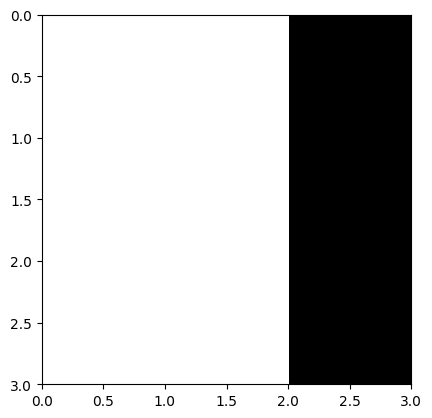

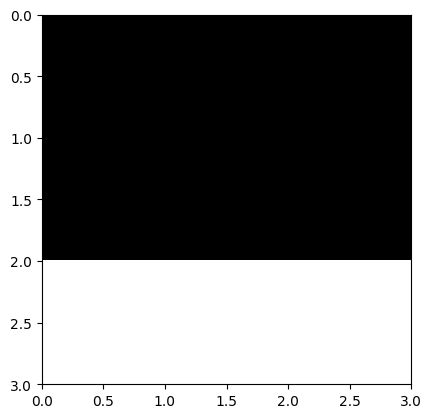

In [26]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [27]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [28]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [29]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [30]:
import torch
import numpy as np

def apply_conv(image, kernel, padding=0, stride=1):
    if image is None:
        raise ValueError("Input image is None")

    # Convert the image to a numpy array if it's not already
    image = np.array(image)

    # Convert the kernel to a numpy array if it's not already
    kernel = np.array(kernel)

    # Convert image and kernel to PyTorch tensors
    image_tensor = torch.from_numpy(image)
    kernel_tensor = torch.from_numpy(kernel)

    # PyTorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
    input_tensor = image_tensor.view((1, 1, image.shape[0], image.shape[1]))

    # Convert kernel to the format (C_in, C_out, kH, kW)
    kernel_tensor = kernel_tensor.view((1, 1, kernel.shape[0], kernel.shape[1]))

    # Define the convolutional layer
    conv_layer = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, stride=stride, padding=padding)

    # Set the kernel weights of the convolutional layer
    conv_layer.weight.data = kernel_tensor.float()

    # Apply convolution operation
    output_tensor = conv_layer(input_tensor.float())

    # Convert output tensor back to numpy array
    output = output_tensor.detach().numpy()

    return output

# Example usage:
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Example filter/kernel
filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

out1 = apply_conv(image, filter, padding=0, stride=1)
print(out1)


[[[[-6.0734286]]]]


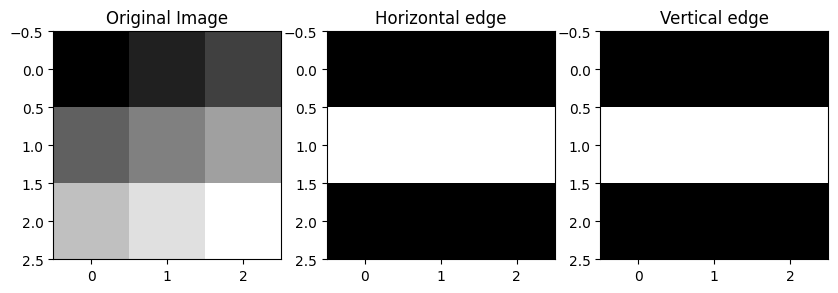

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Assuming you have loaded your image into the variable 'image'
# Example:
# image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Convert image to float32 format
image_float32 = np.float32(image)

# Perform edge detection using Sobel operator
sobelx = cv2.Sobel(image_float32, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_float32, cv2.CV_64F, 0, 1, ksize=3)

# Compute magnitude of gradients
magnitude = np.sqrt(sobelx**2 + sobely**2)

# Normalize to 0-255
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8
magnitude = np.uint8(magnitude)

# Thresholding
threshold = 100
ret, edges = cv2.threshold(magnitude, threshold, 255, cv2.THRESH_BINARY)

# Displaying the original image and edge images
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')

ax = fig.add_subplot(1, 3, 2)
ax.imshow(edges, cmap='gray')
ax.set_title('Horizontal edge')

ax = fig.add_subplot(1, 3, 3)
ax.imshow(edges, cmap='gray')
ax.set_title('Vertical edge')

plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [32]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [34]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [35]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [36]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [37]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [38]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [39]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [40]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [22]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0129, Accuracy: 39.2020
Epoch 2/5, Loss: 0.0093, Accuracy: 57.8340
Epoch 3/5, Loss: 0.0078, Accuracy: 65.0960
Epoch 4/5, Loss: 0.0067, Accuracy: 69.9240
Epoch 5/5, Loss: 0.0059, Accuracy: 73.8620


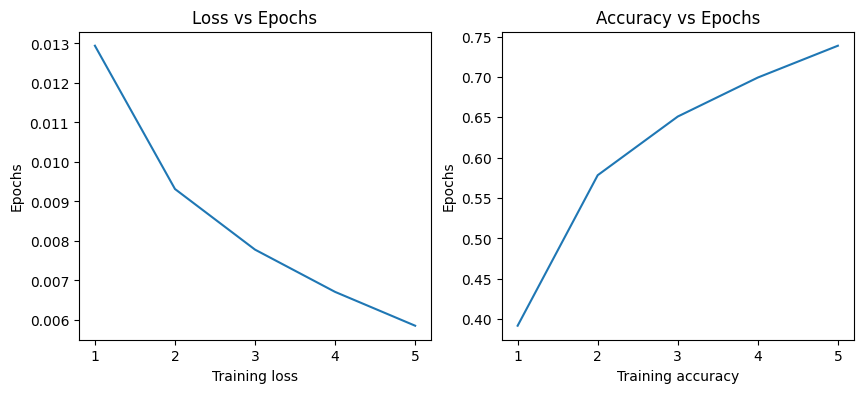

In [23]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [41]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 9 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


#**QUESTION-1 ANSWER**

Convolutional Neural Networks (CNNs) are generally preferred over Artificial Neural Networks (ANNs) for image classification tasks due to several reasons:

1. **Spatial Hierarchies**: CNNs are designed to capture spatial hierarchies present in images. They utilize convolutional layers to extract local patterns and hierarchical features from different spatial locations in the image. This spatial understanding is crucial for tasks like object recognition and segmentation, where the spatial arrangement of features holds significance.

2. **Parameter Sharing**: CNNs leverage parameter sharing, where a single set of weights is shared across different spatial locations in the input image. This significantly reduces the number of parameters compared to fully connected ANNs, making CNNs more efficient, especially when dealing with large images.

3. **Translation Invariance**: CNNs inherently possess translation invariance, meaning they can recognize patterns regardless of their position in the image. This is achieved through the use of convolutional and pooling layers, which extract features locally and downsample the spatial dimensions, making the network robust to translations.

4. **Feature Hierarchy**: CNN architectures typically consist of multiple layers with increasing levels of abstraction. Lower layers capture low-level features like edges and textures, while higher layers capture more complex features and object representations. This hierarchical feature extraction enables CNNs to learn rich representations of images, leading to better classification performance.

5. **Data Efficiency**: CNNs require fewer training samples compared to ANNs to achieve good performance. This is partly due to the shared weights and hierarchical feature extraction, which allows CNNs to generalize well even with limited training data.

6. **Regularization**: CNN architectures often incorporate regularization techniques like dropout and weight decay, which help prevent overfitting and improve generalization performance.

7. **Pretrained Models**: Pretrained CNN models, such as those trained on large datasets like ImageNet, are readily available. These pretrained models can be fine-tuned on specific image classification tasks with relatively small datasets, saving time and computational resources compared to training from scratch.

8. **Hardware Optimization**: CNNs are highly optimized for parallel processing, making them well-suited for deployment on GPUs and specialized hardware like TPUs. This enables efficient inference and scalability for real-time applications and large-scale image classification tasks.

Overall, the specialized architecture of CNNs, tailored for processing grid-like data such as images, along with their ability to learn hierarchical representations and handle large datasets efficiently, makes them the preferred choice for image classification tasks compared to traditional ANNs.

#**QUESTION-2 ANSWER**

To improve the performance of a Convolutional Neural Network (CNN), tuning hyperparameters such as the number of epochs, choice of optimizer, learning rate, and other factors can have a significant impact. Here's a general approach you can take:

**Data Preprocessing:** Ensure your data is properly preprocessed, including normalization and augmentation if necessary.
Model Architecture: Experiment with different architectures, layer configurations, and activation functions.
Hyperparameter Tuning:

**Number of epochs:** Increase or decrease the number of epochs to find the optimal training time.

**Optimizer:** Try different optimizers like Adam, RMSprop, or SGD with different parameters.

**Learning rate (LR):** Adjust the learning rate to find the optimal balance between convergence speed and accuracy. You can try a learning rate scheduler or adaptive learning rate methods.

**Batch size:** Experiment with different batch sizes to see if it affects convergence or generalization.

**Regularization:** Add dropout, L2 regularization, or other regularization techniques to prevent overfitting.

**Architecture tweaks:** Adjust the number of layers, filter sizes, or strides.

**Data augmentation:** Apply data augmentation techniques to increase the diversity of your training data.

**Cross-validation:** Use cross-validation to assess the generalization performance of your model.

#**QUESTION-3 ANSWER-**

Reducing the number of convolutional layers in a Convolutional Neural Network (CNN) can have several effects on the model's performance and capacity to learn features from the data:

1. **Reduced Model Capacity**: With fewer convolutional layers, the model's capacity to learn complex patterns and features from the data is reduced. This may result in a model that is less effective at capturing intricate relationships within the data.

2. **Simpler Model**: A CNN with fewer convolutional layers will generally have a simpler architecture, which may lead to faster training times and reduced computational resources required for training and inference.

3. **Underfitting**: If the reduced model capacity is not sufficient to capture the complexity of the data, the model may underfit, meaning it struggles to learn from the training data and generalizes poorly to unseen data.

4. **Loss of Hierarchical Feature Representation**: Convolutional layers are designed to learn hierarchical representations of features in the input data. By reducing the number of convolutional layers, the model may lose the ability to extract hierarchical features, which can negatively impact its performance.

5. **Decreased Performance**: In many cases, reducing the number of convolutional layers may lead to decreased performance, especially if the dataset is complex and requires a deeper architecture to achieve high accuracy.

In summary, reducing the number of convolutional layers in a CNN simplifies the model and may lead to faster training times, but it also risks reducing the model's capacity to learn complex features from the data, potentially resulting in decreased performance. The impact on performance will depend on the specific characteristics of the dataset and the complexity of the task.

#**QUESTION-4 ANSWER-**

The Softmax activation function is commonly used in the last layer of a Convolutional Neural Network (CNN) for classification tasks. It is particularly well-suited for multi-class classification problems because it normalizes the output of the network into a probability distribution over the classes, ensuring that the output values sum up to 1.

Here are a few reasons why Softmax activation is typically used in the last layer of a CNN for classification tasks:

1. **Probabilistic Interpretation**: Softmax converts the raw output of the neural network into probabilities, making it easier to interpret the model's predictions as the likelihood of each class.

2. **Classification Decision**: Softmax activation allows the model to make a clear decision by selecting the class with the highest probability as the predicted class label.

3. **Cross-Entropy Loss**: Softmax activation is often paired with the categorical cross-entropy loss function, which is commonly used for multi-class classification problems. This combination works well together during training to optimize the model's parameters towards minimizing the classification error.

However, there might be cases where Softmax activation is not used in the last layer of a CNN:

1. **Regression Tasks**: If the task is a regression problem (predicting continuous values), Softmax activation is not appropriate. Instead, linear activation or other suitable activation functions are used depending on the nature of the output.

2. **Specialized Architectures**: In some specialized architectures, such as Siamese networks or networks used for feature extraction, the last layer might not have Softmax activation. These architectures serve different purposes where the final layer's output is used differently, such as computing distances between feature vectors.

In summary, Softmax activation is commonly used in the last layer of a CNN for classification tasks because of its probabilistic interpretation, suitability for multi-class problems, and compatibility with the cross-entropy loss function. However, its usage depends on the specific requirements and nature of the task being solved.